In [1]:
from foggie.utils.foggie_load import *
from foggie.utils.consistency import *
from foggie.clumps.clump_finder import *

In [2]:
code_dir = '/Users/ctrapp/Documents/GitHub/foggie/'
data_dir = '/Volumes/FoggieCam/foggie_halos/'

gal_id = "008508";snapnum = "RD0042"; ##Blizzard

snap_name = data_dir + "halo_"+gal_id+"/nref11c_nref9f/"+snapnum+"/"+snapnum
trackname = code_dir+"/foggie/halo_tracks/"+gal_id+"/nref11n_selfshield_15/halo_track_200kpc_nref9"
halo_c_v_name = code_dir+"/foggie/halo_infos/"+gal_id+"/nref11c_nref9f/halo_c_v"

particle_type_for_angmom = 'gas' #Should be defined by gas with Temps below 1e4 K

catalog_dir = code_dir + 'foggie/halo_infos/' + gal_id + '/nref11c_nref9f/'
#smooth_AM_name = catalog_dir + 'AM_direction_smoothed'
smooth_AM_name = None

ds, refine_box = foggie_load(snap_name, trackfile_name=trackname, halo_c_v_name=halo_c_v_name, do_filter_particles=True,disk_relative=True,particle_type_for_angmom=particle_type_for_angmom,smooth_AM_name = smooth_AM_name)

print("Current time = ",ds.current_time)
print("Current redshift = ",ds.current_redshift)

yt : [INFO     ] 2026-01-29 15:02:35,064 Parameters: current_time              = 639.44480357087
yt : [INFO     ] 2026-01-29 15:02:35,064 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2026-01-29 15:02:35,064 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2026-01-29 15:02:35,065 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2026-01-29 15:02:35,065 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2026-01-29 15:02:35,065 Parameters: current_redshift          = 0
yt : [INFO     ] 2026-01-29 15:02:35,065 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2026-01-29 15:02:35,065 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2026-01-29 15:02:35,065 Parameters: omega_radiation           = 0
yt : [INFO     ] 2026-01-29 15:02:35,066 Parameters: hubble_constant           = 0.695


Opening snapshot /Volumes/FoggieCam/foggie_halos/halo_008508/nref11c_nref9f/RD0042/RD0042


Parsing Hierarchy : 100%|███████████████████████████████████████████████████████| 4251/4251 [00:00<00:00, 28310.33it/s]
yt : [INFO     ] 2026-01-29 15:02:35,261 Gathering a field list (this may take a moment.)


FOGGIE_LOAD: Read track file: /Users/ctrapp/Documents/GitHub/foggie//foggie/halo_tracks/008508/nref11n_selfshield_15/halo_track_200kpc_nref9
get_refine_box: using this location:         col1          col2     col3     col4    col5     col6     col7  col8
------------------- -------- -------- ------- -------- -------- ------- ----
4.4408920985006e-16 0.488865 0.470316 0.50854 0.490865 0.472316 0.51054    9
Will look for halo_c_v_file:  /Users/ctrapp/Documents/GitHub/foggie//foggie/halo_infos/008508/nref11c_nref9f/halo_c_v
Found halo_c_v file: /Users/ctrapp/Documents/GitHub/foggie//foggie/halo_infos/008508/nref11c_nref9f/halo_c_v
Using halo_c_v catalog file:  /Users/ctrapp/Documents/GitHub/foggie//foggie/halo_infos/008508/nref11c_nref9f/halo_c_v  for center style  catalog
Pulling halo center from catalog file
halo center in kpc:  [70482.02075547 67798.01073692 73316.14871677] kpc
halo velocity in km/s:  [ -32.94971619 -152.94040614   63.25068123] km/s
ds.halo_velocity_kms =  [ -32.949716

In [10]:
####Find all the clumps in the refine box####
#### For tempest at z=0 takes around 5 mins on macbook M4-Max (16 cores, 4.51 GHz clock speed)

args = get_default_args() #Get the default arguments without needing to parse_args
print(args)
args.output = "/Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest"
args.clump_min = 1.3e-30
master_clump = clump_finder(args,ds,refine_box) #Returns the clump tree and saves to args.output

Namespace(refinement_level=None, halo='008508', snapshot='RD0042', run='nref11c_nref9f', output='./output/clump_test', clump_min=None, clump_max=None, step=2, mask_disk=False, min_cells=20, nthreads=None, Nsubarrays=64, clumping_field='density', clumping_field_type='gas', only_save_leaves=False, code_dir=None, data_dir=None, include_diagonal_neighbors=False, identify_disk=False, auto_disk_finder=False, cgm_density_cut_type='relative_density', cgm_density_factor=None, max_void_size=0, max_disk_void_size=2000, max_disk_hole_size=25, run_mc_parallel=False, run_mapping_linearly=False, system=None, pwd=False, forcepath=False, cut_radius=None, skip_saving_clumps=False, n_dilation_iterations=0, n_cells_per_dilation=1, closing_iterations=1, use_cylindrical_connectivity_matrix=False, save_clumps_individually=False, disk_criteria='mass', disk_stdv_factor=100.0, identify_satellites=False, max_number_of_satellites=10)
Clump min was set to 1.3e-30
Clump_min is set to 1.3e-30
Clump max set to 5.3793

yt : [WARNING  ] 2025-12-15 13:32:18,141 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'


ucg_list: nan nan
Iterating for clump threshold= 1.3e-30
Marching cubes...
Time to march cubes linearly= 4.770225763320923
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...


/opt/anaconda3/envs/foggie/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Combining clump id sublists...
Time for parallel clump mapping= 24.04500985145569


Adding Children: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 14.29it/s]


Iterating for clump threshold= 2.6e-30
Marching cubes...
Time to march cubes linearly= 4.85122275352478
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 14.141777038574219


Adding Children: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 67/67 [00:01<00:00, 60.17it/s]


Iterating for clump threshold= 5.2e-30
Marching cubes...
Time to march cubes linearly= 4.616358280181885
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 12.040915966033936


Adding Children: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:02<00:00, 100.50it/s]


Iterating for clump threshold= 1.04e-29
Marching cubes...
Time to march cubes linearly= 4.110912799835205
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 9.820093870162964


Adding Children: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 590/590 [00:04<00:00, 135.90it/s]


Iterating for clump threshold= 2.08e-29
Marching cubes...
Time to march cubes linearly= 3.6254520416259766
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 7.666927814483643


Adding Children: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 565/565 [00:13<00:00, 40.74it/s]


Iterating for clump threshold= 4.16e-29
Marching cubes...
Time to march cubes linearly= 3.2458438873291016
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 6.2678327560424805


Adding Children: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 479/479 [00:07<00:00, 61.14it/s]


Iterating for clump threshold= 8.32e-29
Marching cubes...
Time to march cubes linearly= 3.132397174835205
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 4.2704479694366455


Adding Children: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 384/384 [00:04<00:00, 82.09it/s]


Iterating for clump threshold= 1.664e-28
Marching cubes...
Time to march cubes linearly= 3.028640031814575
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 3.9107189178466797


Adding Children: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 403/403 [00:03<00:00, 117.70it/s]


Iterating for clump threshold= 3.328e-28
Marching cubes...
Time to march cubes linearly= 3.0492019653320312
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 4.159783840179443


Adding Children: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 320/320 [00:01<00:00, 213.87it/s]


Iterating for clump threshold= 6.656e-28
Marching cubes...
Time to march cubes linearly= 2.9978301525115967
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 3.87434720993042


Adding Children: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 292/292 [00:01<00:00, 253.66it/s]


Iterating for clump threshold= 1.3312e-27
Marching cubes...
Time to march cubes linearly= 3.018065929412842
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 3.8812060356140137


Adding Children: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:01<00:00, 319.80it/s]


Iterating for clump threshold= 2.6624e-27
Marching cubes...
Time to march cubes linearly= 3.0069398880004883
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 4.055578947067261


Adding Children: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 392/392 [00:00<00:00, 577.43it/s]


Iterating for clump threshold= 5.3248e-27
Marching cubes...
Time to march cubes linearly= 3.0249791145324707
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 3.8823108673095703


Adding Children: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 382/382 [00:00<00:00, 1531.62it/s]


Iterating for clump threshold= 1.06496e-26
Marching cubes...
Time to march cubes linearly= 2.9905190467834473
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 3.923548936843872


Adding Children: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 175/175 [00:00<00:00, 2741.78it/s]

Iterating for clump threshold= 2.12992e-26
Marching cubes...


Time to march cubes linearly= 2.9811460971832275
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 3.929058074951172


Adding Children: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 68/68 [00:00<00:00, 2460.66it/s]

Iterating for clump threshold= 4.25984e-26
Marching cubes...


Time to march cubes linearly= 3.013453722000122
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 4.035601854324341


Adding Children: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 2153.08it/s]

Iterating for clump threshold= 8.51968e-26
Marching cubes...


Time to march cubes linearly= 2.9994821548461914
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 3.9199881553649902


Adding Children: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 2910.91it/s]

Iterating for clump threshold= 1.703936e-25
Marching cubes...


Time to march cubes linearly= 3.0018858909606934
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 3.9437100887298584


Adding Children: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 2883.40it/s]

Iterating for clump threshold= 3.407872e-25
Marching cubes...


Time to march cubes linearly= 2.993288993835449
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 3.94612193107605


Adding Children: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54/54 [00:00<00:00, 4511.26it/s]

Iterating for clump threshold= 6.815744e-25
Marching cubes...


Time to march cubes linearly= 3.020461082458496
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 3.8834922313690186


Adding Children: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 55/55 [00:00<00:00, 5626.51it/s]

Iterating for clump threshold= 1.3631488e-24
Marching cubes...


Time to march cubes linearly= 3.009681224822998
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 3.9040048122406006


Adding Children: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 68/68 [00:00<00:00, 6965.07it/s]

Iterating for clump threshold= 2.7262976e-24
Marching cubes...


Time to march cubes linearly= 3.02832293510437
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 4.0888121128082275


Adding Children: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48/48 [00:00<00:00, 8586.45it/s]

Iterating for clump threshold= 5.4525952e-24
Marching cubes...


Time to march cubes linearly= 3.0054571628570557
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 3.9617488384246826


Adding Children: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 67/67 [00:00<00:00, 23180.60it/s]

Iterating for clump threshold= 1.09051904e-23
Marching cubes...


Time to march cubes linearly= 3.024336099624634
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 3.8913400173187256


Adding Children: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 22017.34it/s]

Iterating for clump threshold= 2.18103808e-23
Marching cubes...


Time to march cubes linearly= 2.9869918823242188
Updating clump catalog...
Finding parallel clump_id_sublists...
Working with 15 threads...
Combining clump id sublists...
Time for parallel clump mapping= 4.185520887374878


Adding Children: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 24385.49it/s]

No clumps found at this threshold...terminating
Saving Clump Hierarchy...
Appending root...
Appending leaf...
Appending root...
Appending leaf...
Appending root...
Appending leaf...
Appending root...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appendin

Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending 

yt : [INFO     ] 2025-12-15 13:37:13,523 Saving field data to yt dataset: /Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTestYTClumpDataset.h5.


YTClumpTest is: <foggie.clumps.clump_finder.utils_clump_finder.YTClumpLean object at 0x337db9a90>
For 15 threads total time= 311.48803901672363


Loading Leaves...:  78%|██████████████████████████████████████████████▏            | 749/957 [00:00<00:00, 7487.29it/s]/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:206: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
Loading Leaves...: 100%|████████████████████████████████████████████████████████████| 957/957 [00:02<00:00, 349.72it/s]
yt : [WARNING  ] 2026-01-29 15:16:36,492 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2026-01-29 15:16:44,460 Projection completed
yt : [INFO     ] 2026-01-29 15:16:44,460 xlim = 0.489155 0.490545
yt : [INFO     ] 2026-01-29 15:16:44,460 ylim = 0.470501 0.471891
yt : [INFO     ] 2026-01-29 15:16:44,461 xlim = 0.489155 0.490545
yt : [INFO     ] 2026-01-29 15:16:44,461 ylim = 0.470501 0.471891
yt : [INFO     ] 2026-01-29 15:16:44,461 Making a fixed reso


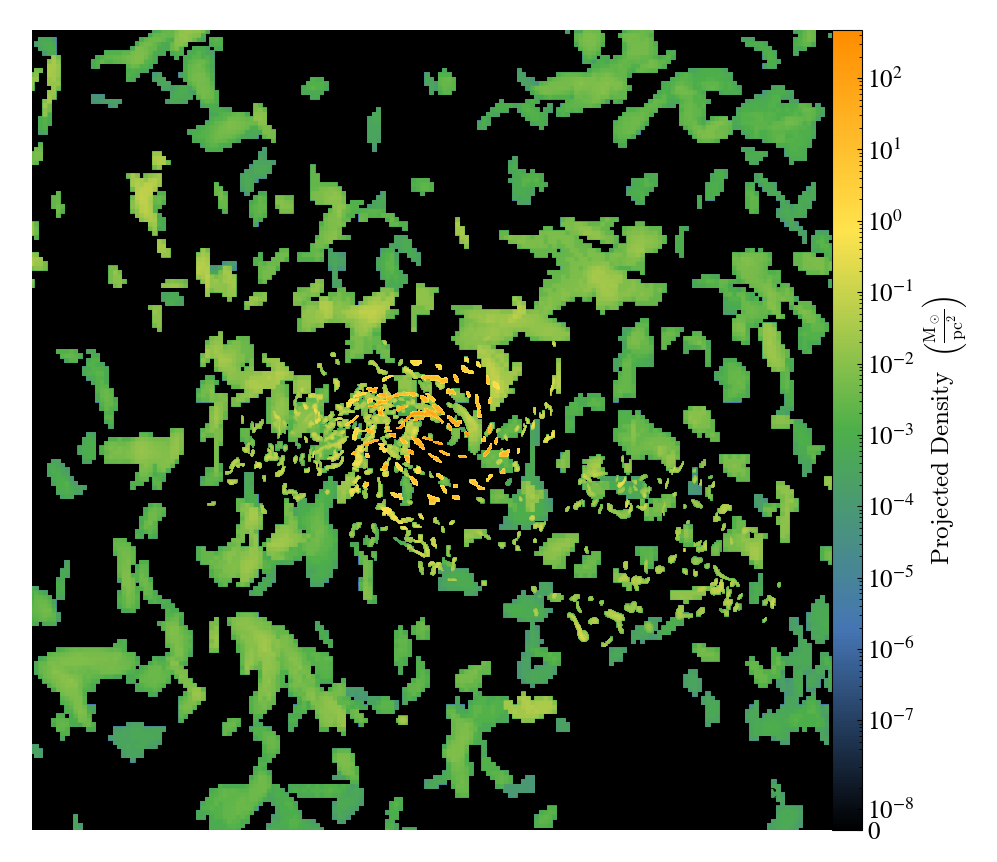

In [8]:
#Load in all the leaf clumps (no children) as a single cut region
leaf_clumps = load_all_leaves(ds,"/Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest_ClumpTree.h5")
p = yt.ProjectionPlot(ds, 'z', ('gas','density'), center=ds.halo_center_code, data_source=leaf_clumps, width=(200,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
#p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
#p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'black'})
p.show()


In [3]:
####Find all the clumps along with the shells aroudn them####

args = get_default_args() #Get the default arguments without needing to parse_args
print(args)
args.output = "/Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTestWithDilation"
args.clump_min = 1.3e-30
args.n_dilation_iterations = 1
args.n_cells_per_dilation = 4
master_clump = clump_finder(args,ds,refine_box) #Returns the clump tree and saves to args.output

Namespace(refinement_level=None, halo='008508', snapshot='RD0042', run='nref11c_nref9f', output='./output/clump_test', clump_min=None, clump_max=None, step=2, mask_disk=False, min_cells=20, nthreads=None, Nsubarrays=64, clumping_field='density', clumping_field_type='gas', only_save_leaves=False, code_dir=None, data_dir=None, include_diagonal_neighbors=False, identify_disk=False, auto_disk_finder=False, cgm_density_cut_type='relative_density', cgm_density_factor=None, max_void_size=0, max_disk_void_size=2000, max_disk_hole_size=25, run_mc_parallel=False, run_mapping_linearly=False, system=None, pwd=False, forcepath=False, cut_radius=None, skip_saving_clumps=False, n_dilation_iterations=0, n_cells_per_dilation=1, closing_iterations=1, use_cylindrical_connectivity_matrix=False, save_clumps_individually=False, disk_criteria='mass', disk_stdv_factor=100.0, identify_satellites=False, max_number_of_satellites=10, save_YTClumpContainer=False)


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:206: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)


Clump min was set to 1.3e-30
Clump_min is set to 1.3e-30
Clump max set to 5.379342241837713e-23 g/cm**3
n_levels= 26
min_cells set to: 20
Defining ucgs...
YTRegion (RD0042): , center=[2.17491431e+26 2.09256002e+26 2.26226785e+26] cm, left_edge=[2.17047449e+26 2.08812020e+26 2.25782802e+26] cm, right_edge=[2.17935414e+26 2.09699985e+26 2.26670767e+26] cm
dx_uniform= 1.9073486328125e-06 code_length
data_source_left_edge= [unyt_quantity(0.48886871, 'code_length'), unyt_quantity(0.47031403, 'code_length'), unyt_quantity(0.50853729, 'code_length')]
data_source_right_edge= [unyt_quantity(0.49086761, 'code_length'), unyt_quantity(0.47231293, 'code_length'), unyt_quantity(0.51053619, 'code_length')]


yt : [WARNING  ] 2026-01-29 15:02:49,366 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'


ucg_list: nan nan
Iterating for clump threshold= 1.3e-30
Marching cubes...
Time to march cubes linearly= 4.998700141906738
Updating clump catalog...


Adding Children: 100%|█████████████████████████████████████████████████████████████████| 13/13 [00:48<00:00,  3.75s/it]


Iterating for clump threshold= 2.6e-30
Marching cubes...
Time to march cubes linearly= 4.720421075820923
Updating clump catalog...


Adding Children: 100%|█████████████████████████████████████████████████████████████████| 67/67 [00:47<00:00,  1.42it/s]


Iterating for clump threshold= 5.2e-30
Marching cubes...
Time to march cubes linearly= 4.5287370681762695
Updating clump catalog...


Adding Children:  67%|██████████████████████████████████████████▎                    | 188/280 [00:41<00:01, 63.70it/s]

Clump with 20 cells added at tree level 2


Adding Children:  76%|████████████████████████████████████████████████▏              | 214/280 [00:42<00:00, 86.99it/s]

Clump with 20 cells added at tree level 2


Adding Children: 100%|███████████████████████████████████████████████████████████████| 280/280 [00:42<00:00,  6.54it/s]


Clump with 20 cells added at tree level 2
Iterating for clump threshold= 1.04e-29
Marching cubes...
Time to march cubes linearly= 4.083935976028442
Updating clump catalog...


Adding Children:  16%|██████████▌                                                     | 97/590 [00:31<00:14, 34.76it/s]

Clump with 20 cells added at tree level 3
Clump with 20 cells added at tree level 3


Adding Children:  32%|████████████████████                                           | 188/590 [00:31<00:04, 88.79it/s]

Clump with 20 cells added at tree level 3


Adding Children: 100%|███████████████████████████████████████████████████████████████| 590/590 [00:34<00:00, 17.03it/s]


Iterating for clump threshold= 2.08e-29
Marching cubes...
Time to march cubes linearly= 3.6107687950134277
Updating clump catalog...


Adding Children:  22%|█████████████▉                                                 | 125/565 [00:23<00:08, 53.89it/s]

Clump with 20 cells added at tree level 4


Adding Children: 100%|███████████████████████████████████████████████████████████████| 565/565 [00:33<00:00, 16.62it/s]


Iterating for clump threshold= 4.16e-29
Marching cubes...
Time to march cubes linearly= 3.300899028778076
Updating clump catalog...


Adding Children:  85%|█████████████████████████████████████████████████████▎         | 405/479 [00:19<00:01, 49.75it/s]

Clump with 20 cells added at tree level 5


Adding Children:  91%|█████████████████████████████████████████████████████████▏     | 435/479 [00:19<00:00, 65.72it/s]

Clump with 20 cells added at tree level 5


Adding Children: 100%|███████████████████████████████████████████████████████████████| 479/479 [00:20<00:00, 23.03it/s]


Iterating for clump threshold= 8.32e-29
Marching cubes...
Time to march cubes linearly= 3.1315371990203857
Updating clump catalog...


Adding Children:  18%|███████████▎                                                    | 68/384 [00:08<00:04, 70.05it/s]

Clump with 20 cells added at tree level 6


Adding Children: 100%|███████████████████████████████████████████████████████████████| 384/384 [00:12<00:00, 30.19it/s]


Iterating for clump threshold= 1.664e-28
Marching cubes...
Time to march cubes linearly= 3.062922954559326
Updating clump catalog...


Adding Children:  75%|██████████████████████████████████████████████▎               | 301/403 [00:05<00:01, 100.83it/s]

Clump with 20 cells added at tree level 7


Adding Children: 100%|███████████████████████████████████████████████████████████████| 403/403 [00:07<00:00, 55.70it/s]


Iterating for clump threshold= 3.328e-28
Marching cubes...
Time to march cubes linearly= 3.0621728897094727
Updating clump catalog...


Adding Children: 100%|██████████████████████████████████████████████████████████████| 320/320 [00:02<00:00, 116.39it/s]


Iterating for clump threshold= 6.656e-28
Marching cubes...
Time to march cubes linearly= 3.045112133026123
Updating clump catalog...


Adding Children:  17%|███████████                                                    | 51/292 [00:00<00:01, 134.46it/s]

Clump with 20 cells added at tree level 9


Adding Children: 100%|██████████████████████████████████████████████████████████████| 292/292 [00:01<00:00, 159.68it/s]


Iterating for clump threshold= 1.3312e-27
Marching cubes...
Time to march cubes linearly= 3.0561001300811768
Updating clump catalog...


Adding Children:  35%|█████████████████████▋                                        | 114/326 [00:00<00:00, 239.20it/s]

Clump with 20 cells added at tree level 10


Adding Children:  76%|███████████████████████████████████████████████▎              | 249/326 [00:01<00:00, 194.21it/s]

Clump with 20 cells added at tree level 10


Adding Children:  95%|██████████████████████████████████████████████████████████▉   | 310/326 [00:01<00:00, 181.97it/s]

Clump with 20 cells added at tree level 10


Adding Children: 100%|██████████████████████████████████████████████████████████████| 326/326 [00:01<00:00, 198.75it/s]


Iterating for clump threshold= 2.6624e-27
Marching cubes...
Time to march cubes linearly= 3.0372908115386963
Updating clump catalog...


Adding Children:  54%|█████████████████████████████████▎                            | 211/392 [00:00<00:00, 380.58it/s]

Clump with 20 cells added at tree level 11


Adding Children:  84%|████████████████████████████████████████████████████▎         | 331/392 [00:00<00:00, 306.24it/s]

Clump with 20 cells added at tree level 11


Adding Children: 100%|██████████████████████████████████████████████████████████████| 392/392 [00:01<00:00, 303.57it/s]


Iterating for clump threshold= 5.3248e-27
Marching cubes...
Time to march cubes linearly= 3.050581932067871
Updating clump catalog...


Adding Children:  25%|███████████████▉                                               | 97/382 [00:00<00:00, 967.59it/s]

Clump with 20 cells added at tree level 12
Clump with 20 cells added at tree level 12


Adding Children:  68%|██████████████████████████████████████████▏                   | 260/382 [00:00<00:00, 558.88it/s]

Clump with 20 cells added at tree level 12
Clump with 20 cells added at tree level 12


Adding Children: 100%|██████████████████████████████████████████████████████████████| 382/382 [00:00<00:00, 517.88it/s]


Clump with 20 cells added at tree level 12
Iterating for clump threshold= 1.06496e-26
Marching cubes...
Time to march cubes linearly= 3.0297091007232666
Updating clump catalog...


Adding Children: 100%|██████████████████████████████████████████████████████████████| 175/175 [00:00<00:00, 566.09it/s]


Iterating for clump threshold= 2.12992e-26
Marching cubes...
Time to march cubes linearly= 3.052478075027466
Updating clump catalog...


Adding Children: 100%|████████████████████████████████████████████████████████████████| 68/68 [00:00<00:00, 433.75it/s]


Iterating for clump threshold= 4.25984e-26
Marching cubes...
Time to march cubes linearly= 3.074416160583496
Updating clump catalog...


Adding Children: 100%|████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 354.91it/s]


Iterating for clump threshold= 8.51968e-26
Marching cubes...
Time to march cubes linearly= 3.0897037982940674
Updating clump catalog...


Adding Children: 100%|████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 298.54it/s]


Iterating for clump threshold= 1.703936e-25
Marching cubes...
Time to march cubes linearly= 3.0688748359680176
Updating clump catalog...


Adding Children: 100%|████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 341.61it/s]


Iterating for clump threshold= 3.407872e-25
Marching cubes...
Time to march cubes linearly= 3.045159101486206
Updating clump catalog...


Adding Children: 100%|████████████████████████████████████████████████████████████████| 54/54 [00:00<00:00, 503.76it/s]


Clump with 20 cells added at tree level 18
Iterating for clump threshold= 6.815744e-25
Marching cubes...
Time to march cubes linearly= 3.0769569873809814
Updating clump catalog...


Adding Children: 100%|████████████████████████████████████████████████████████████████| 55/55 [00:00<00:00, 566.09it/s]


Iterating for clump threshold= 1.3631488e-24
Marching cubes...
Time to march cubes linearly= 3.0455007553100586
Updating clump catalog...


Adding Children: 100%|████████████████████████████████████████████████████████████████| 68/68 [00:00<00:00, 757.84it/s]


Iterating for clump threshold= 2.7262976e-24
Marching cubes...
Time to march cubes linearly= 3.0827829837799072
Updating clump catalog...


Adding Children: 100%|████████████████████████████████████████████████████████████████| 48/48 [00:00<00:00, 828.46it/s]


Iterating for clump threshold= 5.4525952e-24
Marching cubes...
Time to march cubes linearly= 3.052438974380493
Updating clump catalog...


Adding Children: 100%|████████████████████████████████████████████████████████████████| 67/67 [00:00<00:00, 977.83it/s]


Clump with 20 cells added at tree level 22
Iterating for clump threshold= 1.09051904e-23
Marching cubes...
Time to march cubes linearly= 3.0728001594543457
Updating clump catalog...


Adding Children: 100%|███████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 1063.35it/s]


Iterating for clump threshold= 2.18103808e-23
Marching cubes...
Time to march cubes linearly= 3.062351942062378
Updating clump catalog...


Adding Children: 100%|██████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 886.93it/s]


No clumps found at this threshold...terminating
Saving Clump Hierarchy...
Appending root...
Appending leaf...
Appending root...
Appending leaf...
Appending root...
Appending leaf...
Appending root...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appending leaf...
Appendin

/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:206: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
yt : [WARNING  ] 2026-01-29 15:15:37,000 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'


Clump center= [unyt_quantity(2.17409661e+26, 'cm'), unyt_quantity(2.09325627e+26, 'cm'), unyt_quantity(2.26549954e+26, 'cm')]
Clump dimensions= [array(2.19550922), array(9.87979148), array(5.48877304)]
Clump size= 9.87979147931951


yt : [INFO     ] 2026-01-29 15:15:44,062 Projection completed
yt : [INFO     ] 2026-01-29 15:15:44,063 xlim = 0.489612 0.489749
yt : [INFO     ] 2026-01-29 15:15:44,063 ylim = 0.471404 0.471541
yt : [INFO     ] 2026-01-29 15:15:44,064 xlim = 0.489612 0.489749
yt : [INFO     ] 2026-01-29 15:15:44,064 ylim = 0.471404 0.471541
yt : [INFO     ] 2026-01-29 15:15:44,064 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



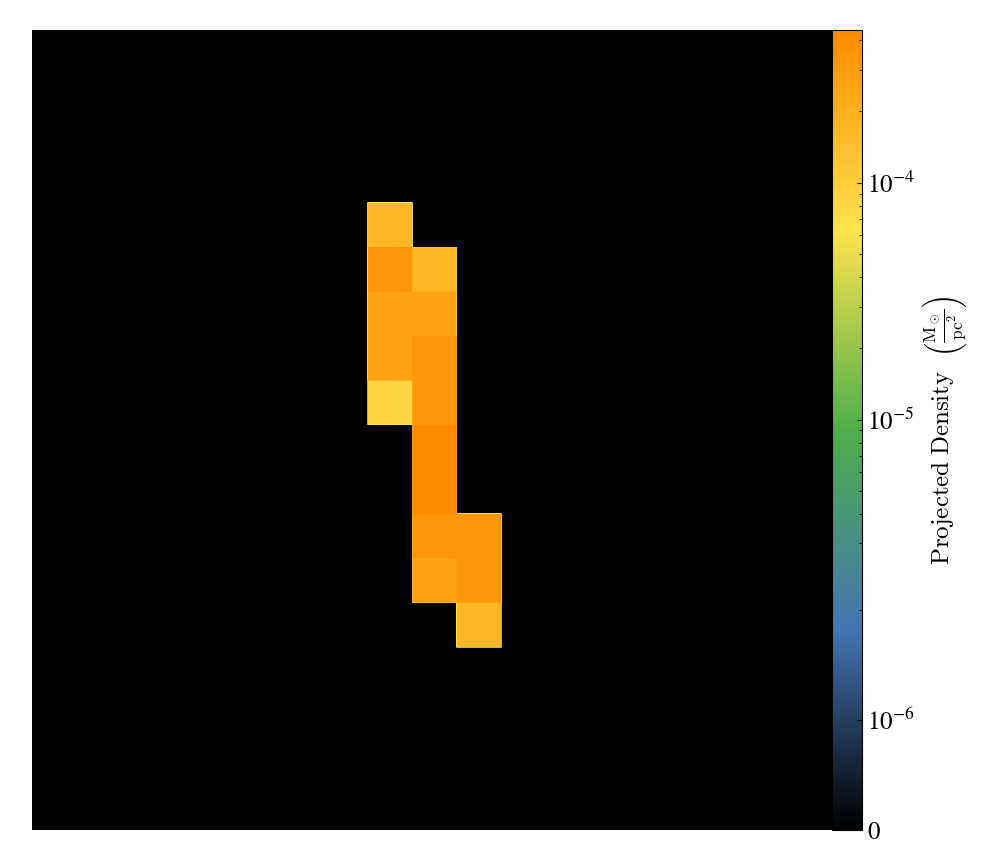

yt : [INFO     ] 2026-01-29 15:15:50,792 Projection completed
yt : [INFO     ] 2026-01-29 15:15:50,793 xlim = 0.489612 0.489749
yt : [INFO     ] 2026-01-29 15:15:50,793 ylim = 0.471404 0.471541
yt : [INFO     ] 2026-01-29 15:15:50,794 xlim = 0.489612 0.489749
yt : [INFO     ] 2026-01-29 15:15:50,794 ylim = 0.471404 0.471541
yt : [INFO     ] 2026-01-29 15:15:50,794 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



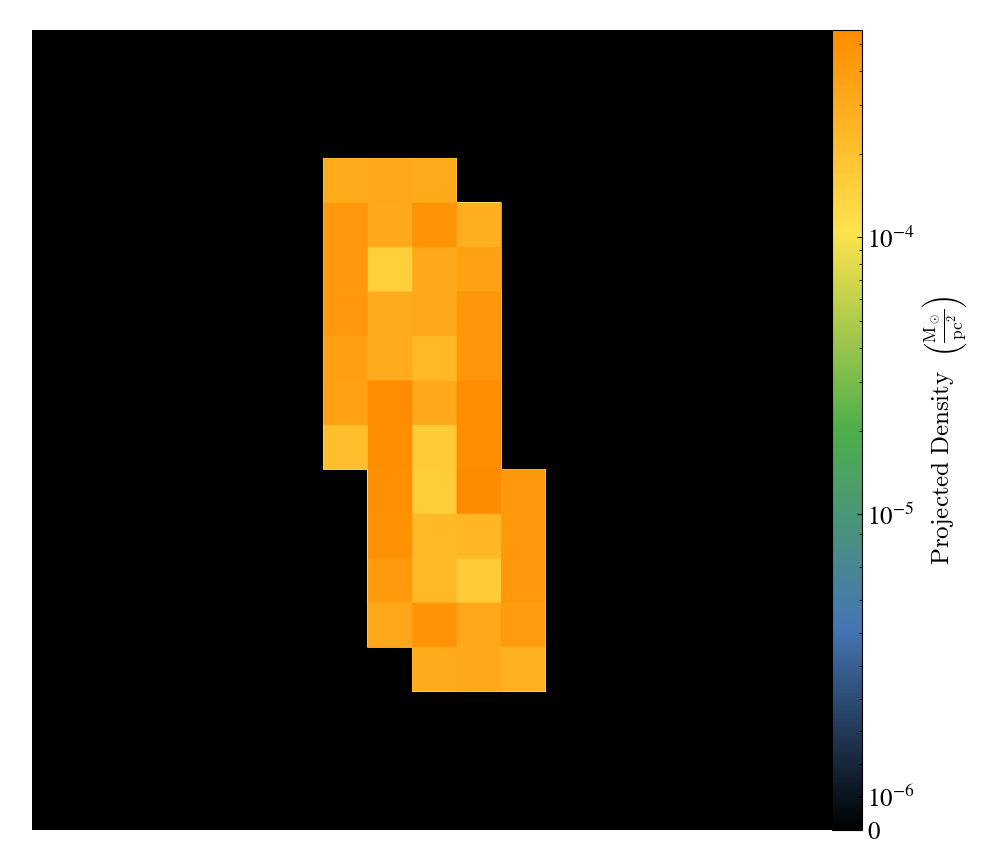

In [7]:
#Load in all the leaf clumps (no children) as a single cut region
hierarchy_file = "/Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTestWithDilation_ClumpTree.h5"

clump_idx = 20
hf = h5py.File(hierarchy_file,'r')
leaf_ids = hf['leaf_clump_ids'][...]

clump = load_clump(ds,clump_cell_ids=hf[str(leaf_ids[clump_idx])]['cell_ids'][...],skip_adding_cell_ids=False)
hf.close()

clump_shell = load_clump_shell(ds, hierarchy_file,leaf_ids[clump_idx])

clump_mass = np.sum(clump['gas','mass'])
clump_center = [np.sum(np.multiply(clump['gas','x'],clump['gas','mass']))/clump_mass, 
                np.sum(np.multiply(clump['gas','y'],clump['gas','mass']))/clump_mass, 
                np.sum(np.multiply(clump['gas','z'],clump['gas','mass']))/clump_mass]


dx = (np.max(clump['gas','x']) - np.min(clump['gas','x'])).in_units('kpc').v
dy = (np.max(clump['gas','y']) - np.min(clump['gas','y'])).in_units('kpc').v
dz = (np.max(clump['gas','z']) - np.min(clump['gas','z'])).in_units('kpc').v

clump_size = np.max([dx,dy,dz])
#clump_size = 10.

print("Clump center=",clump_center)
print("Clump dimensions=",[dx,dy,dz])
print("Clump size=",clump_size)


p = yt.ProjectionPlot(ds, 'z', ('gas','density'), center=clump_center, data_source=clump, width=(clump_size*2,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
#p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
#p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'black'})
p.show()

p = yt.ProjectionPlot(ds, 'z', ('gas','density'), center=clump_center, data_source=clump_shell, width=(clump_size*2,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
#p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
#p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'black'})
p.show()



In [12]:
#### Find the Disk ####
#### For tempest at z=0 takes around 1 min on macbook M4-Max (16 cores, 4.51 GHz clock speed)

run_default=True
### This can be run simply using the disk definition defined in FOGGIE XII/XIII (Trapp+25a,b) as follows:
disk_output = "/Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest"
if run_default:
    disk = disk_finder(ds,refine_box,disk_output)

### Or you can customize the disk finding parameters as follows:
args = get_default_args()
args.output = "/Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest"
args.identify_disk = True #Run as a disk finder

args.fill_by_closing = True
args.cgm_density_factor = 5.
args.max_disk_void_size = np.round( (5. / 0.274)**3. ).astype(int)
args.max_disk_hole_size = int(np.round(7./0.274)) #~36
args.closing_iterations = 1
args.n_dilation_iterations = 10 #Dilate the disk mask 10 times by 1 cell each (at nref 11 -> ~2.74 kpc, each shell was a width of 0.274 kpc)
args.n_cells_per_dilation = 1
args.clumping_field = "H_p0_number_density"
disk_file = args.output + "_Disk.h5"



if not run_default:
    disk = clump_finder(args,ds,refine_box)

yt : [WARNING  ] 2025-12-15 13:37:33,755 Field ('gas', 'H_p0_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2025-12-15 13:37:33,755 Field ('gas', 'H_p0_density') already exists. Not clobbering.
yt : [WARNING  ] 2025-12-15 13:37:33,755 Field ('gas', 'H_p0_mass') already exists. Not clobbering.
/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:202: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)


Clump min was set to None
Rvir set to: 168.34407792499337
cgm_density_cut was: 0.0064815585799999995 cm**(-3) stdv= 3.357872366820426e-05 cm**(-3)
cgm_density_cut= 0.009839430946820426 cm**(-3) clump_max= 24.282430865535172 cm**(-3) min_val= 8.53247328094966e-16 cm**(-3)
n_levels= 1
Defining disk ucgs...


yt : [WARNING  ] 2025-12-15 13:37:48,970 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'


ucg_list: nan nan
Iterating for clump threshold= 0.009839430946820426 cm**(-3)
Marching cubes...
Time to march cubes linearly= 6.128260135650635
Updating clump catalog...
Determining disk object based on mass
For clump 1 current_max set to 0.21264299516834384
For clump 7 current_max set to 24607.499300084615
disk_label set to: 7
Cataloging and filling in disk...
Disk label is 7
Void filling filled 33 cells in 3d cavities.
Binary closing filled 278964 cells.
Void filling after binary closing filled 0 cells in 3d cavities.
Saving filled holes at /Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest_FilledDiskHoles.h5
Saving clump at /Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest_Disk.h5
For 15 threads total time= 90.9701600074768


In [5]:
####Test using the files generated####
from foggie.clumps.clump_finder.utils_clump_finder import load_clump
from foggie.clumps.clump_finder.utils_clump_finder import mask_clump

disk_file = args.output+"_Disk.h5"
disk_cut = load_clump(ds, disk_file)

yt : [INFO     ] 2025-12-15 13:45:56,989 Projection completed
yt : [INFO     ] 2025-12-15 13:45:56,992 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:45:56,992 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:45:56,993 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:45:56,993 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:45:56,994 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



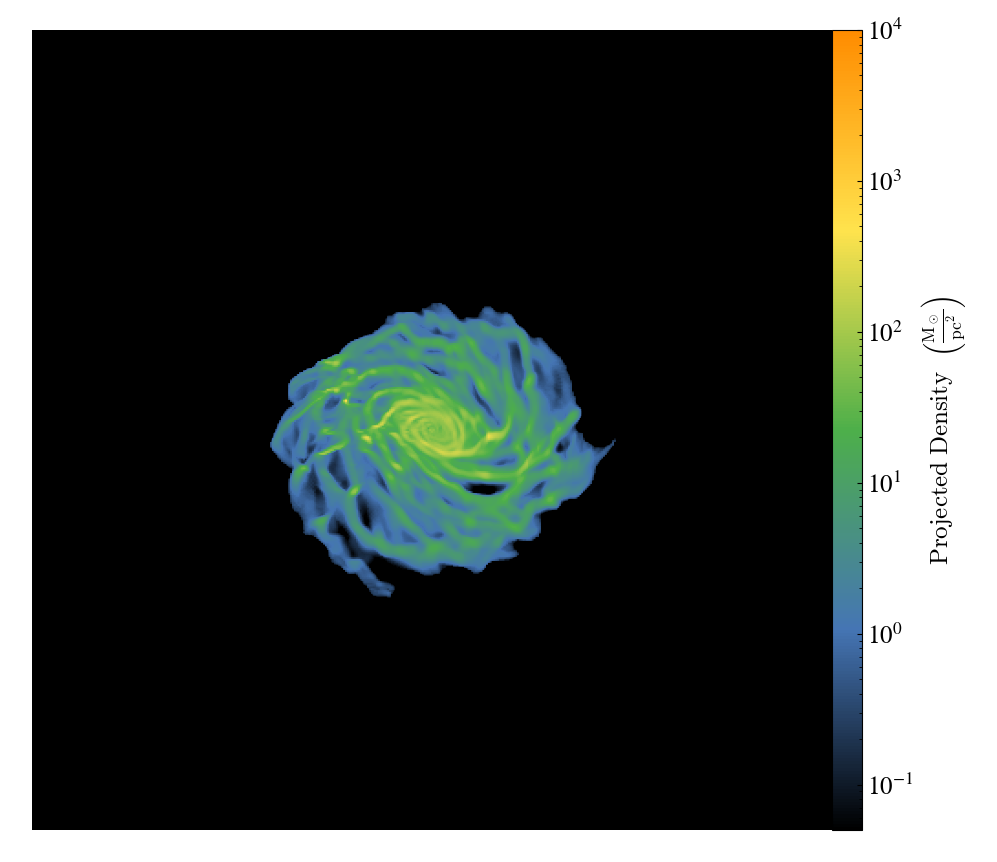

yt : [INFO     ] 2025-12-15 13:46:05,134 Projection completed
yt : [INFO     ] 2025-12-15 13:46:05,134 xlim = 0.509130 0.509964
yt : [INFO     ] 2025-12-15 13:46:05,134 ylim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:46:05,135 xlim = 0.509130 0.509964
yt : [INFO     ] 2025-12-15 13:46:05,135 ylim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:46:05,136 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



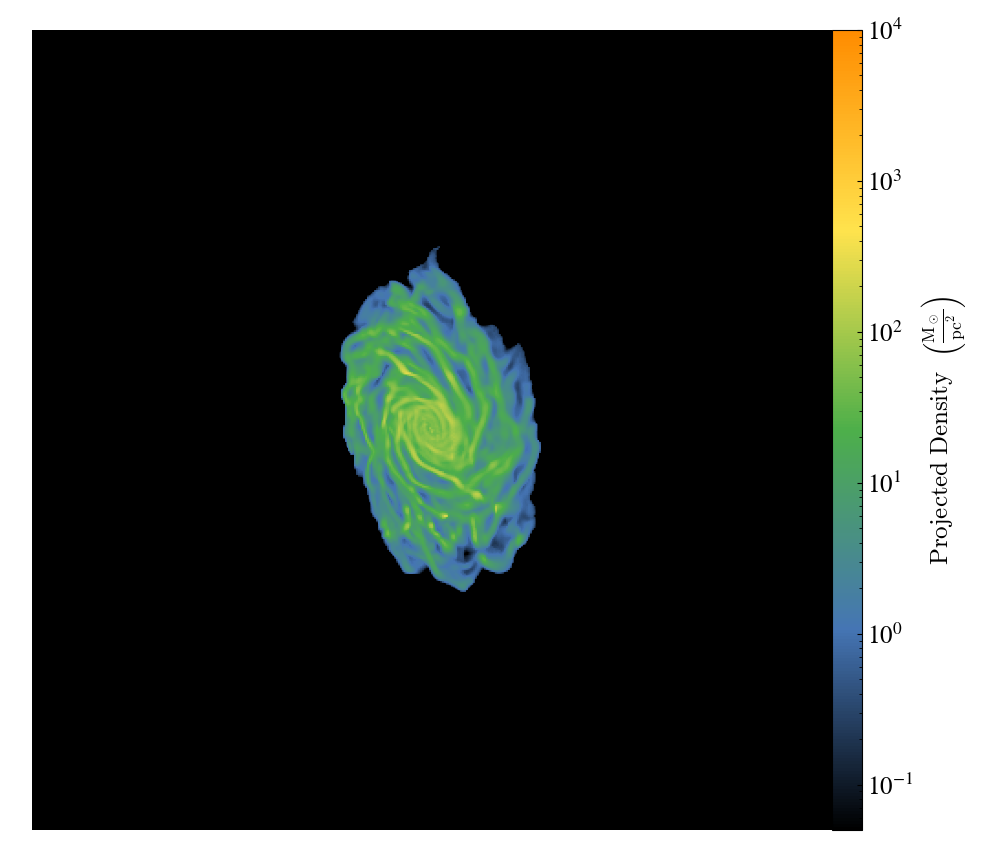

yt : [INFO     ] 2025-12-15 13:46:13,028 Projection completed
yt : [INFO     ] 2025-12-15 13:46:13,028 xlim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:46:13,028 ylim = 0.509130 0.509964
yt : [INFO     ] 2025-12-15 13:46:13,029 xlim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:46:13,029 ylim = 0.509130 0.509964
yt : [INFO     ] 2025-12-15 13:46:13,029 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



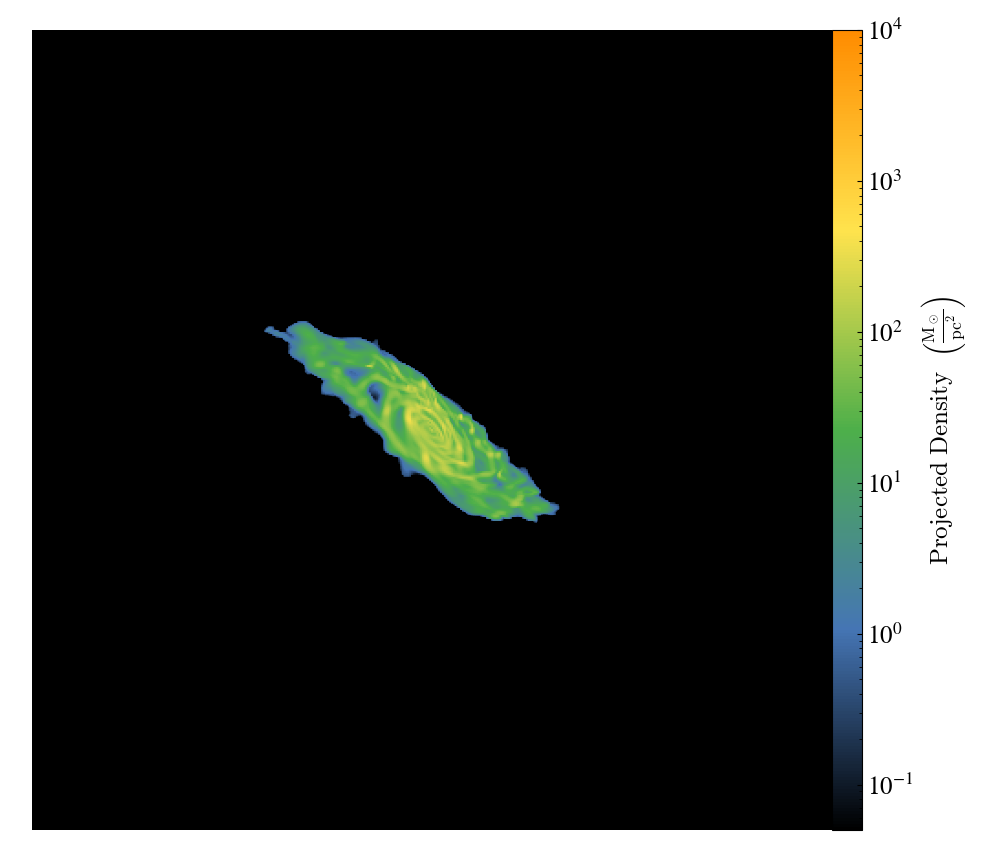

In [6]:

p = yt.ProjectionPlot(ds, 'z', ('gas','density'), center=ds.halo_center_code, data_source=disk_cut, width=(120,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
#p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'black'})
p.show()

p = yt.ProjectionPlot(ds, 'y', ('gas','density'), center=ds.halo_center_code, data_source=disk_cut, width=(120,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
#p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'black'})
p.show()

p = yt.ProjectionPlot(ds, 'x', ('gas','density'), center=ds.halo_center_code, data_source=disk_cut, width=(120,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
#p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'black'})
p.show()

/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:202: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
yt : [WARNING  ] 2025-12-15 13:46:20,772 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2025-12-15 13:46:25,021 Projection completed
yt : [INFO     ] 2025-12-15 13:46:25,021 xlim = 0.489294 0.490406
yt : [INFO     ] 2025-12-15 13:46:25,021 ylim = 0.470640 0.471752
yt : [INFO     ] 2025-12-15 13:46:25,022 xlim = 0.489294 0.490406
yt : [INFO     ] 2025-12-15 13:46:25,022 ylim = 0.470640 0.471752
yt : [INFO     ] 2025-12-15 13:46:25,022 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



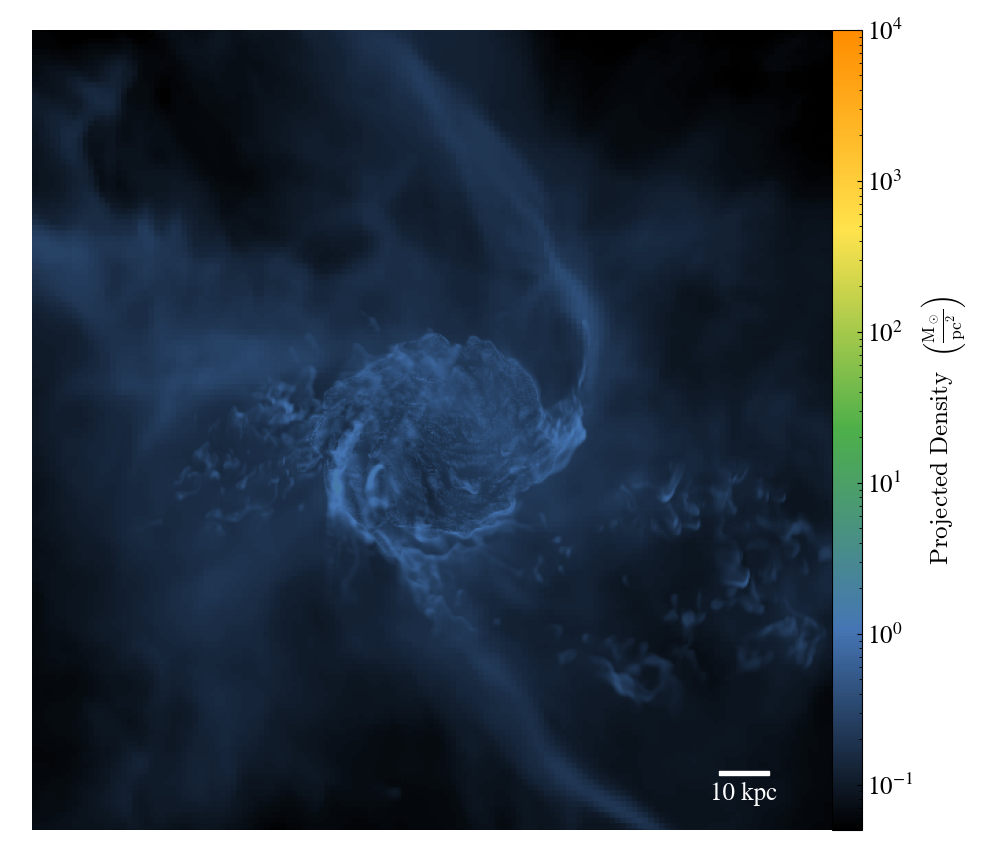

In [7]:
#### Get everything but the disk ####
#cgm_cut = mask_clump(ds, disk_file, refine_box)
p = yt.ProjectionPlot(ds, 'z', ('gas','density'), center=ds.halo_center_code, data_source = refine_box-disk_cut, width=(160,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
#p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'white'})
p.show()


In [8]:
#### Find the Disk and additional shells around the disk ####
#### For tempest at z=0 takes around 1 min on macbook M4-Max (16 cores, 4.51 GHz clock speed)
args = get_default_args()
args.output = "/Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest1"
args.identify_disk = True #Run as a disk finder
args.n_dilation_iterations = 10 #Dilate the disk mask 10 times by 1 cell each (at nref 11 -> ~2.74 kpc, each shell was a width of 0.274 kpc)
args.n_cells_per_dilation = 1
#args.cgm_density_cut_type = 'comoving_density'
#args.cgm_density_factor = 0.4
args.cgm_density_factor = 200.
disk = clump_finder(args,ds,refine_box)

/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:202: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)


Clump min was set to None
Rvir set to: 168.34407792499337
cgm_density_cut= 5.973653745758826e-27 g/cm**3 clump_max= 5.379342241837713e-23 g/cm**3 min_val= 1.583649544558707e-31 g/cm**3
n_levels= 1
Defining disk ucgs...


yt : [WARNING  ] 2025-12-15 13:47:16,820 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'


ucg_list: nan nan
Iterating for clump threshold= 5.973653745758826e-27 g/cm**3
Marching cubes...
Time to march cubes linearly= 5.054996967315674
Updating clump catalog...
Determining disk object based on mass
For clump 1 current_max set to 3.8134537972133114e-25
For clump 17 current_max set to 7.103953078098891e-25
For clump 25 current_max set to 1.5493003688844229e-24
For clump 42 current_max set to 1.2207798011974894e-23
For clump 128 current_max set to 5.60225560161579e-20
disk_label set to: 128
Cataloging and filling in disk...
Disk label is 128
Void filling filled 183 cells in 3d cavities.
Binary closing filled 407097 cells.
Void filling after binary closing filled 0 cells in 3d cavities.
Saving filled holes at /Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest1_FilledDiskHoles.h5
Saving dilated shell at /Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest1_DiskDilationShell_n0.h5
Saving dilated shell at /Users/ctrapp/Documen

Original Disk:


yt : [INFO     ] 2025-12-15 13:48:31,208 Projection completed
yt : [INFO     ] 2025-12-15 13:48:31,209 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:48:31,209 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:48:31,210 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:48:31,210 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:48:31,210 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



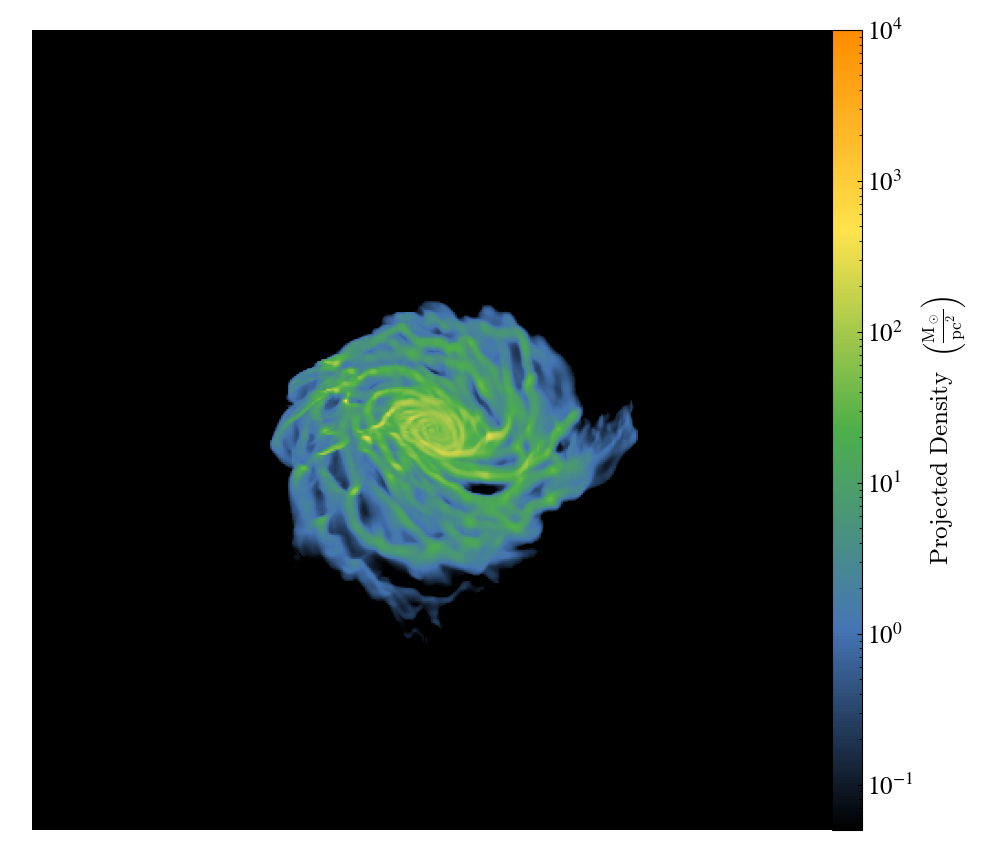

Loading Shell 0 ...


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:202: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
yt : [WARNING  ] 2025-12-15 13:48:34,442 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2025-12-15 13:48:41,471 Projection completed
yt : [INFO     ] 2025-12-15 13:48:41,472 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:48:41,472 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:48:41,473 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:48:41,473 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:48:41,473 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



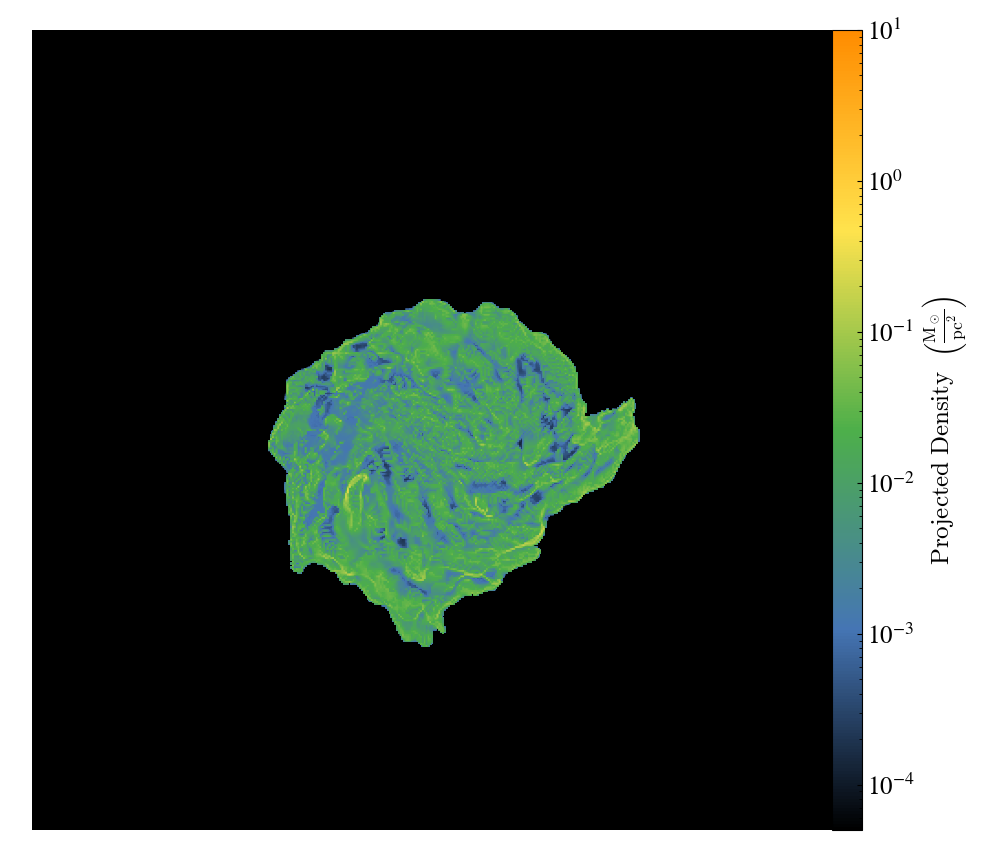

Loading Shell 1 ...


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:202: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
yt : [WARNING  ] 2025-12-15 13:48:57,468 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2025-12-15 13:49:04,452 Projection completed
yt : [INFO     ] 2025-12-15 13:49:04,452 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:49:04,452 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:49:04,453 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:49:04,453 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:49:04,454 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



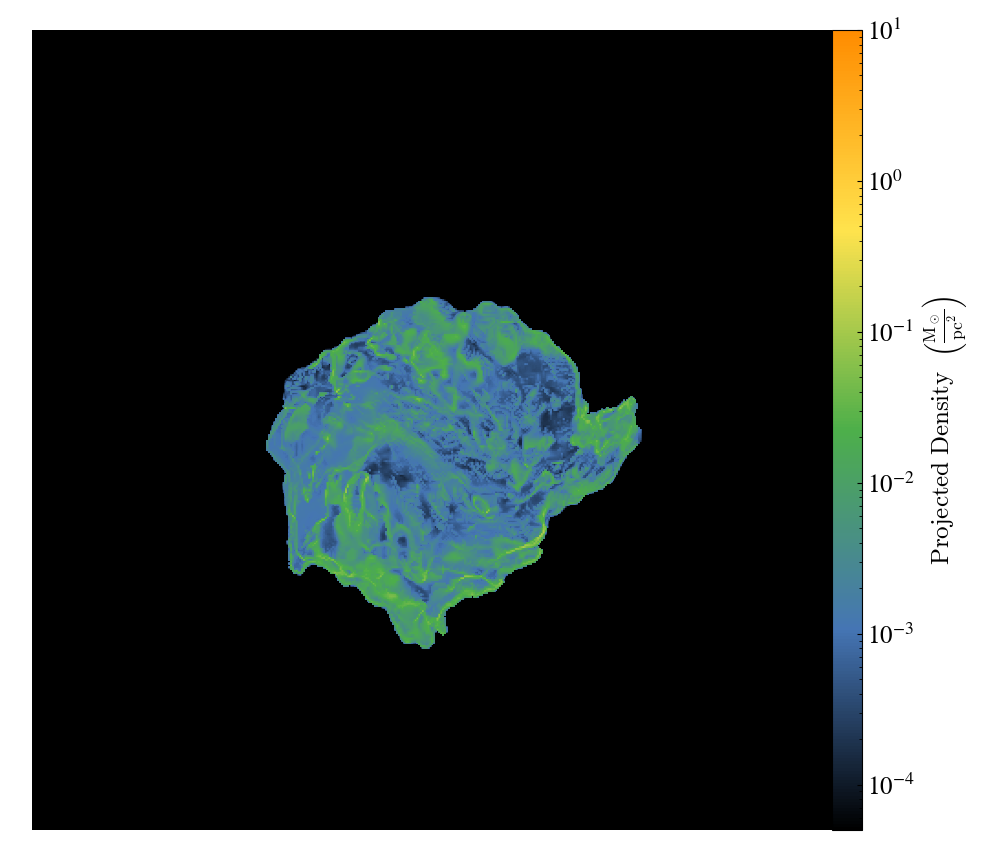

Loading Shell 2 ...


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:202: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
yt : [WARNING  ] 2025-12-15 13:49:13,481 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2025-12-15 13:49:20,346 Projection completed
yt : [INFO     ] 2025-12-15 13:49:20,346 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:49:20,346 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:49:20,347 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:49:20,347 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:49:20,348 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



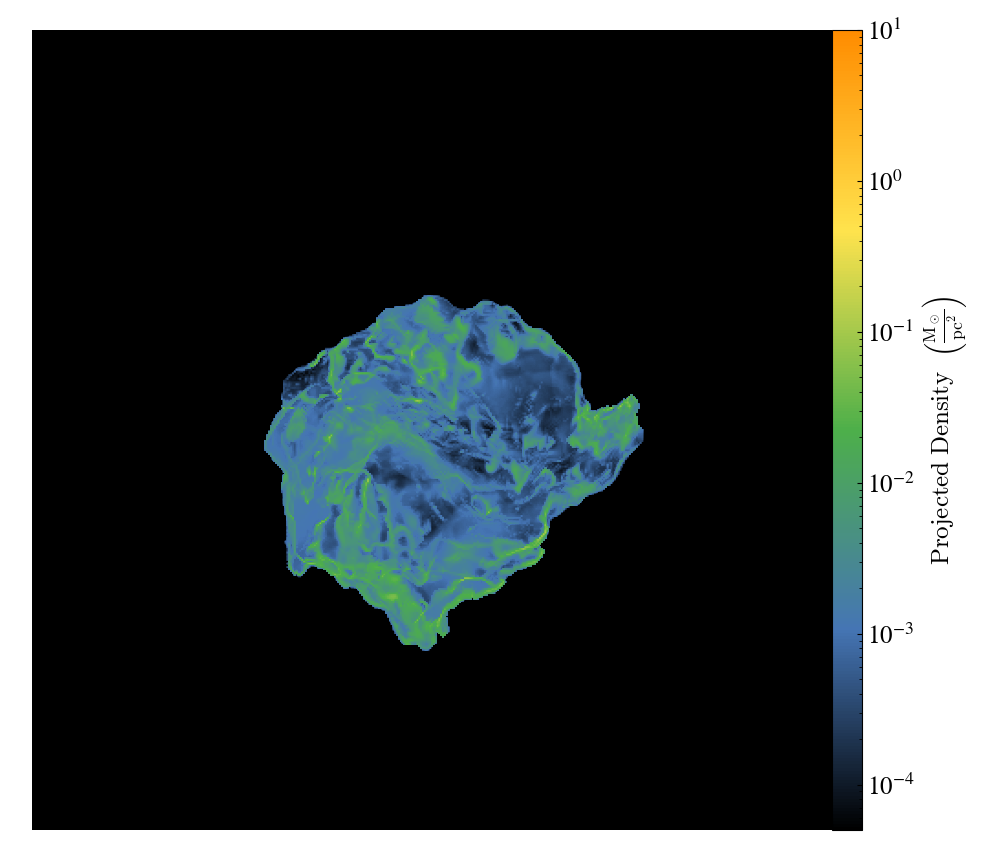

Loading Shell 3 ...


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:202: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
yt : [WARNING  ] 2025-12-15 13:49:29,458 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2025-12-15 13:49:36,663 Projection completed
yt : [INFO     ] 2025-12-15 13:49:36,663 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:49:36,663 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:49:36,664 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:49:36,664 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:49:36,665 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



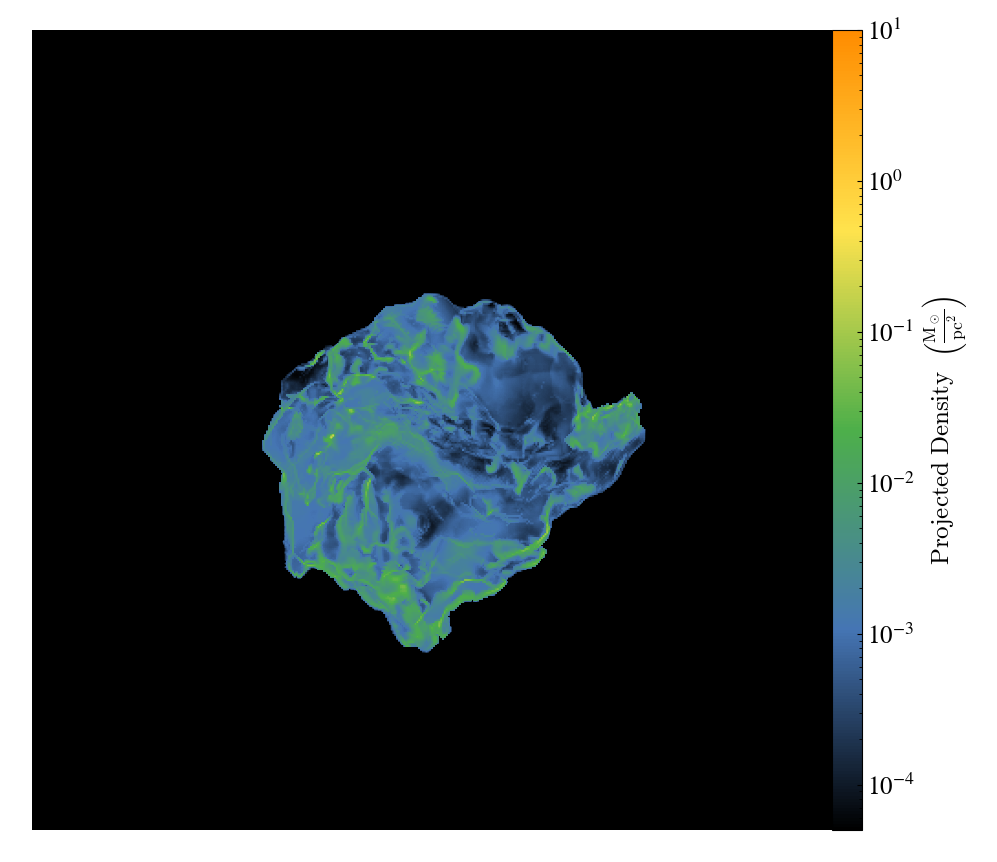

Loading Shell 4 ...


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:202: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
yt : [WARNING  ] 2025-12-15 13:49:45,912 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2025-12-15 13:49:52,908 Projection completed
yt : [INFO     ] 2025-12-15 13:49:52,909 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:49:52,909 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:49:52,910 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:49:52,910 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:49:52,910 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



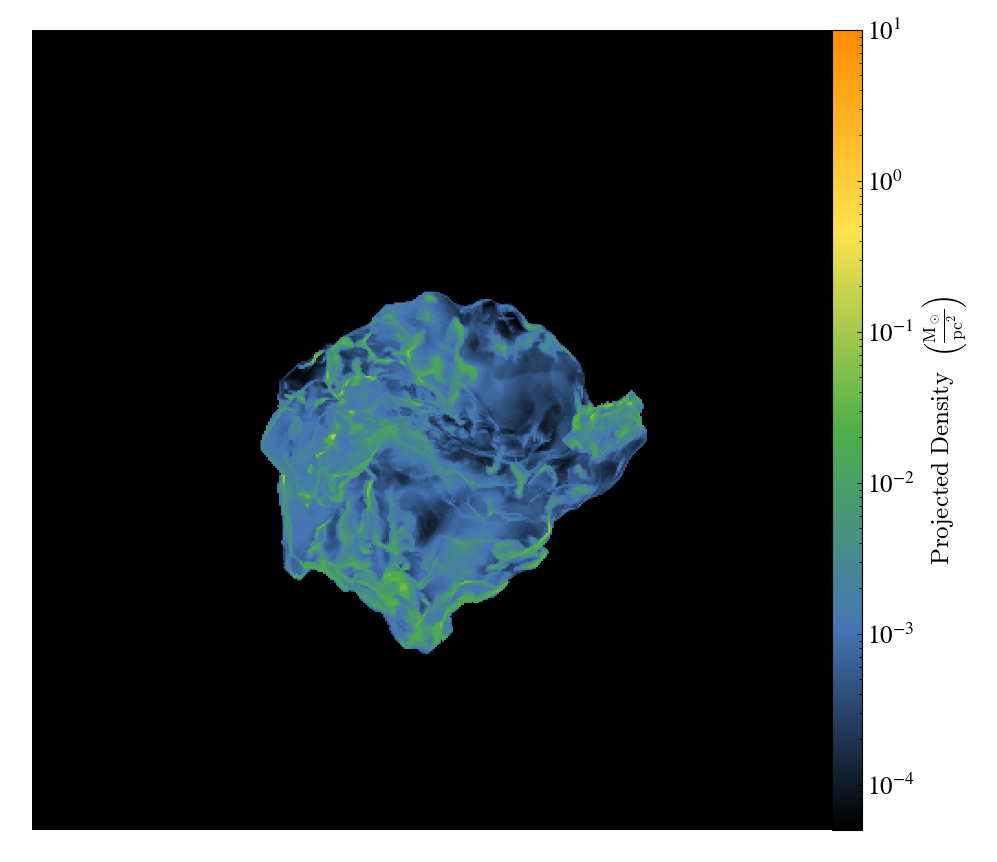

Loading Shell 5 ...


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:202: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
yt : [WARNING  ] 2025-12-15 13:50:02,098 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2025-12-15 13:50:09,145 Projection completed
yt : [INFO     ] 2025-12-15 13:50:09,145 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:50:09,145 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:50:09,146 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:50:09,146 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:50:09,146 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



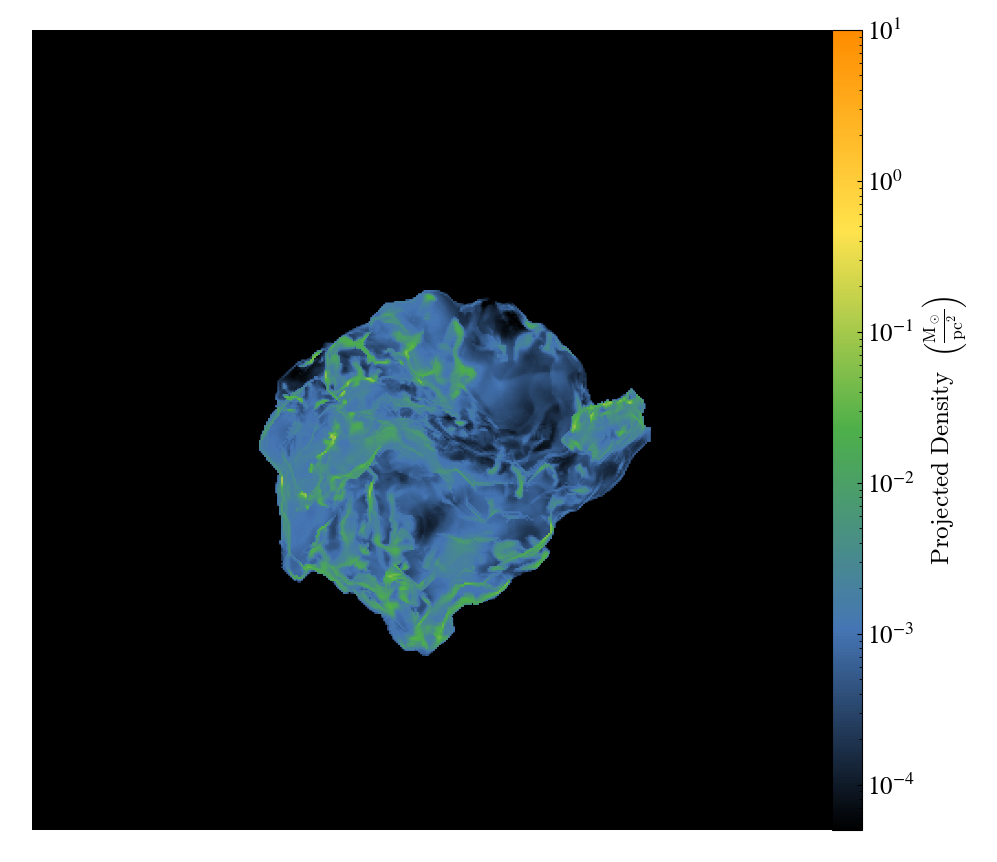

Loading Shell 6 ...


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:202: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
yt : [WARNING  ] 2025-12-15 13:50:18,161 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2025-12-15 13:50:25,226 Projection completed
yt : [INFO     ] 2025-12-15 13:50:25,226 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:50:25,226 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:50:25,227 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:50:25,227 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:50:25,228 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



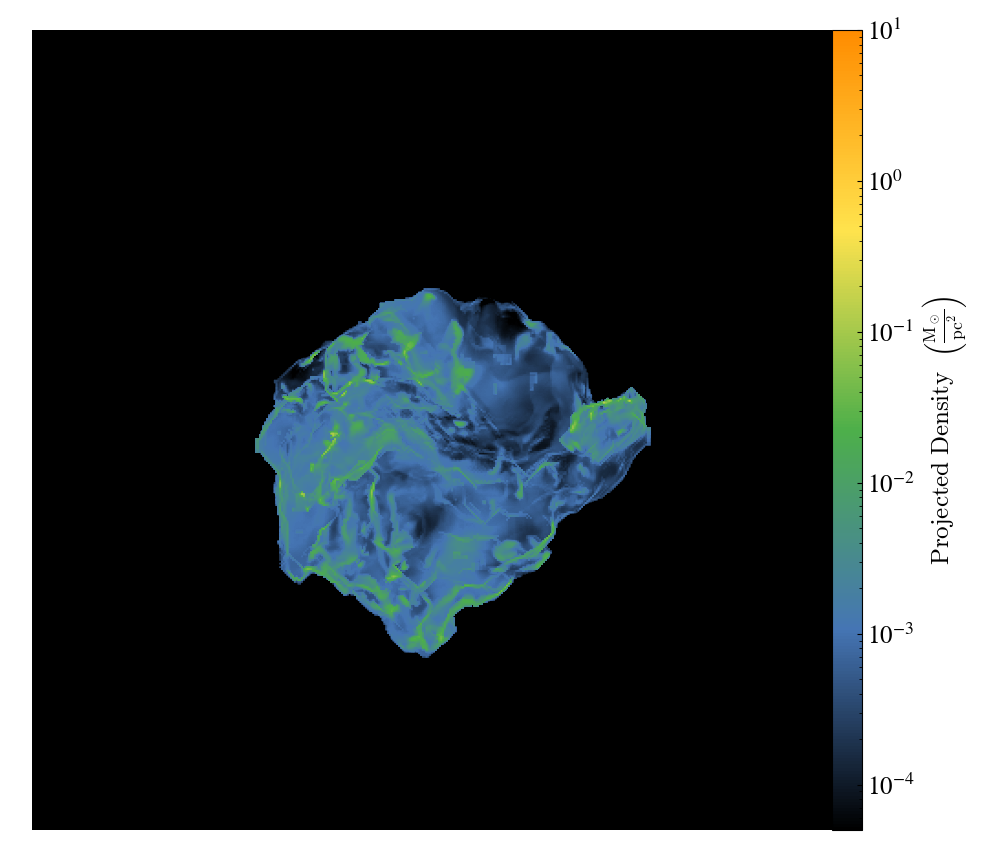

Loading Shell 7 ...


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:202: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
yt : [WARNING  ] 2025-12-15 13:50:34,367 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2025-12-15 13:50:41,753 Projection completed
yt : [INFO     ] 2025-12-15 13:50:41,753 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:50:41,753 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:50:41,754 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:50:41,754 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:50:41,755 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


Loading Shell 8 ...


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:202: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
yt : [WARNING  ] 2025-12-15 13:50:50,865 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2025-12-15 13:50:57,589 Projection completed
yt : [INFO     ] 2025-12-15 13:50:57,589 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:50:57,589 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:50:57,590 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:50:57,590 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:50:57,590 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


Loading Shell 9 ...


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:202: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)
yt : [WARNING  ] 2025-12-15 13:51:06,244 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [INFO     ] 2025-12-15 13:51:13,008 Projection completed
yt : [INFO     ] 2025-12-15 13:51:13,008 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:51:13,008 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:51:13,009 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:51:13,009 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:51:13,009 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



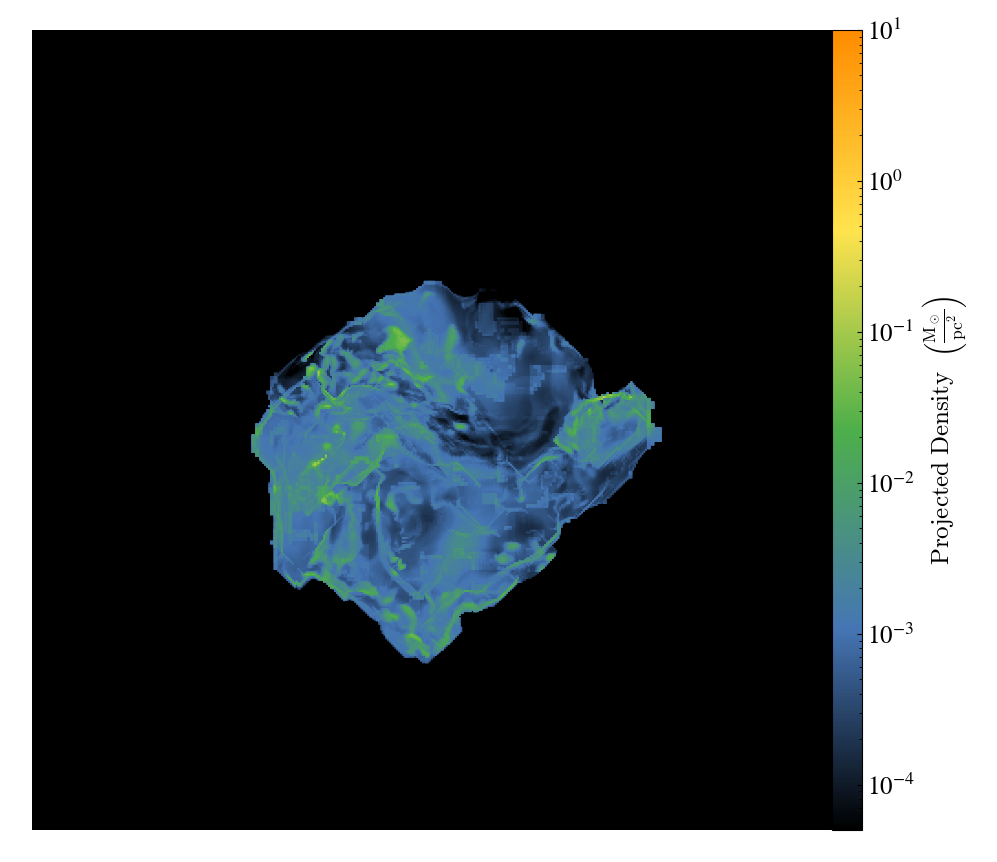

Combined Shells:


yt : [INFO     ] 2025-12-15 13:52:00,417 Projection completed
yt : [INFO     ] 2025-12-15 13:52:00,418 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:52:00,418 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:52:00,419 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:52:00,419 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:52:00,419 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



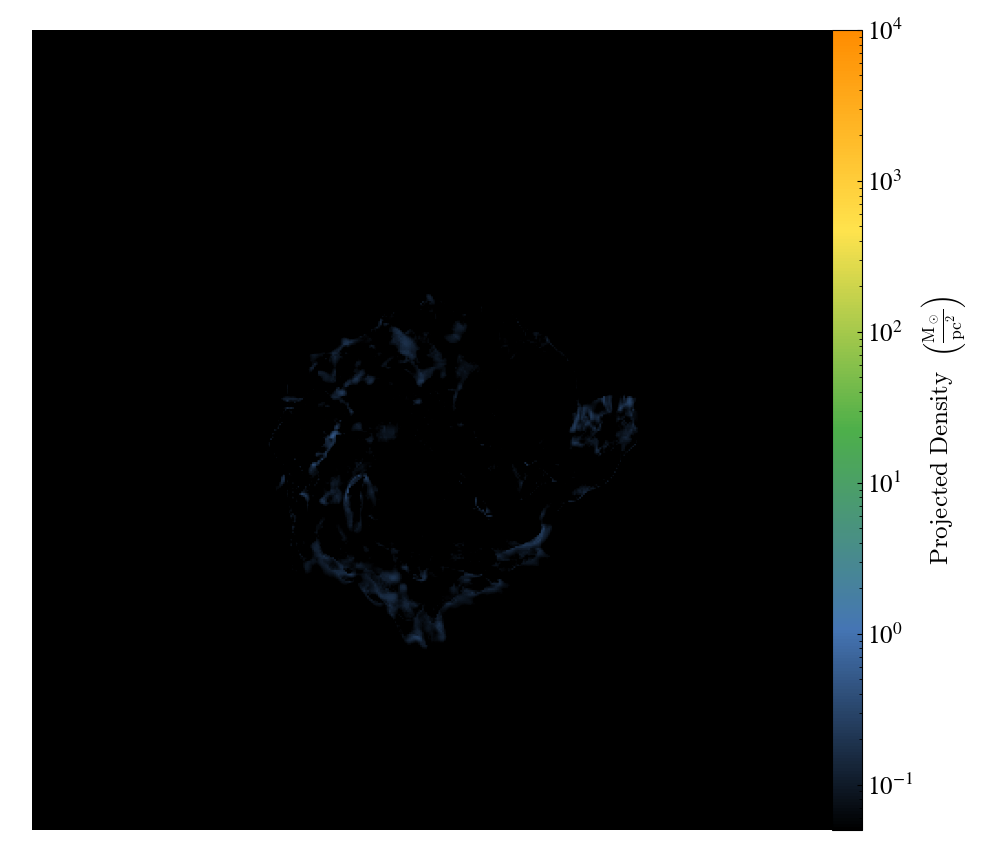

Dilated Disk:


yt : [INFO     ] 2025-12-15 13:52:48,964 Projection completed
yt : [INFO     ] 2025-12-15 13:52:48,964 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:52:48,964 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:52:48,965 xlim = 0.489433 0.490267
yt : [INFO     ] 2025-12-15 13:52:48,965 ylim = 0.470779 0.471613
yt : [INFO     ] 2025-12-15 13:52:48,966 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



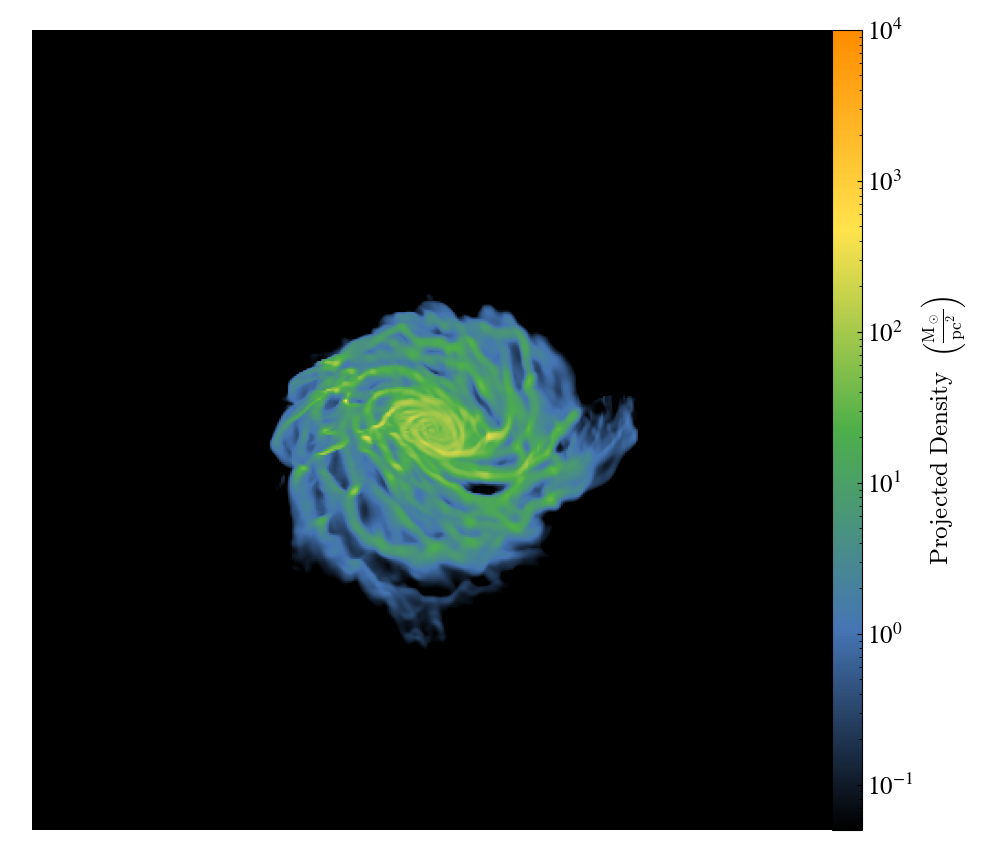

In [9]:
####Test using the shell and disk files generated####
from foggie.clumps.clump_finder.utils_clump_finder import load_clump
from foggie.clumps.clump_finder.utils_clump_finder import mask_clump

disk_file = args.output+"_Disk.h5"
shell_filebase = args.output+"_DiskDilationShell_n"
disk_cut = load_clump(ds, disk_file)


print("Original Disk:")
p = yt.ProjectionPlot(ds, 'z', ('gas','density'), center=ds.halo_center_code, data_source=disk_cut, width=(120,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
#p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'black'})
p.show()

for i in range(0,args.n_dilation_iterations):
    print("Loading Shell",i,"...")
    shell_cut = load_clump(ds, shell_filebase+str(int(i))+".h5") #When loading multiple clumps, make sure to set the clump id or the cut regions will be overwritten


    p = yt.ProjectionPlot(ds, 'z', ('gas','density'), center=ds.halo_center_code, data_source=shell_cut, width=(120,'kpc'))
    p.set_cmap(('gas','density'),density_color_map)
    p.set_unit(('gas','density'),'Msun/pc**2')
    p.set_zlim(('gas','density'),density_proj_min/1000.,density_proj_max/1000.)
    #p.hide_colorbar()
    p.hide_axes()
    p.annotate_scale(size_bar_args={'color':'black'})
    p.show()

    if i==0:
        dilated_disk_cut = disk_cut + shell_cut
        combined_shell_cuts = shell_cut
    else:
        dilated_disk_cut = dilated_disk_cut + shell_cut
        combined_shell_cuts = combined_shell_cuts + shell_cut

print("Combined Shells:")
p = yt.ProjectionPlot(ds, 'z', ('gas','density'), center=ds.halo_center_code, data_source=combined_shell_cuts, width=(120,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
#p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'black'})
p.show()


print("Dilated Disk:")
p = yt.ProjectionPlot(ds, 'z', ('gas','density'), center=ds.halo_center_code, data_source=dilated_disk_cut, width=(120,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
#p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'black'})
p.show()


In [ ]:
#### Find Satellites ####
#### Looks for clumps of DM to identify subhalo cores, and then searches for clumps of gas near these cores with the standard disk definition
#### This is not super optimized yet
from foggie.clumps.clump_finder import satellite_finder
### This can be run simply using the disk definition defined in FOGGIE XII/XIII (Trapp+25a,b) as follows:
sat_output = "/Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest"

satellites = satellite_finder(ds,refine_box,sat_output)

Identifying dark matter clumps


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:202: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)


Clump min was set to None
Clump_min is set to None
Clump min set to 1.3355858076125004e+41 g/kpc**3
Clump max set to 1.3355860542926314e+41 g/kpc**3
n_levels= 1
Defining disk ucgs...


yt : [WARNING  ] 2025-12-15 13:53:07,420 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'


ucg_list: nan nan
Clump min set to 3.8197142335464135e+36
Clump max set to 7.639428467092827e+40
n_levels updated to 15
Iterating for clump threshold= 3.8197142335464135e+36
Marching cubes...
Time to march cubes linearly= 4.6397271156311035
Updating clump catalog...


Adding Children: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16812/16812 [00:47<00:00, 355.70it/s]


Iterating for clump threshold= 7.639428467092827e+36
Marching cubes...
Time to march cubes linearly= 5.239176273345947
Updating clump catalog...


Adding Children: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35883/35883 [02:37<00:00, 228.34it/s]


Iterating for clump threshold= 1.5278856934185654e+37
Marching cubes...
Time to march cubes linearly= 4.375413179397583
Updating clump catalog...


Adding Children: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20754/20754 [00:32<00:00, 638.14it/s]


Iterating for clump threshold= 3.055771386837131e+37
Marching cubes...
Time to march cubes linearly= 3.608314037322998
Updating clump catalog...


Adding Children: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6643/6643 [00:05<00:00, 1140.08it/s]


Iterating for clump threshold= 6.111542773674262e+37
Marching cubes...
Time to march cubes linearly= 3.3391401767730713
Updating clump catalog...


Adding Children: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1303/1303 [00:01<00:00, 1008.17it/s]


Iterating for clump threshold= 1.2223085547348523e+38
Marching cubes...
Time to march cubes linearly= 3.2582242488861084
Updating clump catalog...


Adding Children: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 692.95it/s]


Iterating for clump threshold= 2.4446171094697046e+38
Marching cubes...
Time to march cubes linearly= 3.2178239822387695
Updating clump catalog...


Adding Children: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44/44 [00:00<00:00, 325.21it/s]


Iterating for clump threshold= 4.889234218939409e+38
Marching cubes...
Time to march cubes linearly= 3.2947909832000732
Updating clump catalog...


Adding Children: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 129.07it/s]


Iterating for clump threshold= 9.778468437878819e+38
Marching cubes...
Time to march cubes linearly= 3.276216983795166
Updating clump catalog...


Adding Children: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 211.00it/s]


Iterating for clump threshold= 1.9556936875757637e+39
Marching cubes...
Time to march cubes linearly= 3.220426082611084
Updating clump catalog...


Adding Children: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 268.92it/s]


Iterating for clump threshold= 3.9113873751515274e+39
Marching cubes...
Time to march cubes linearly= 3.1569511890411377
Updating clump catalog...


Adding Children: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 202.89it/s]


Iterating for clump threshold= 7.822774750303055e+39
Marching cubes...
Time to march cubes linearly= 3.1757078170776367
Updating clump catalog...


Adding Children: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 385.65it/s]


Iterating for clump threshold= 1.564554950060611e+40
Marching cubes...
Time to march cubes linearly= 3.16972279548645
Updating clump catalog...


Adding Children: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 646.37it/s]


Iterating for clump threshold= 3.129109900121222e+40
Marching cubes...
Time to march cubes linearly= 3.196758985519409
Updating clump catalog...


Adding Children: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1240.92it/s]


No clumps found at this threshold...terminating
Saving Clump Hierarchy...
Appending leaf...
Appending root...
Appending leaf...
Appending root...
Appending leaf...
Appending root...
Appending leaf...
Appending root...
Appending leaf...
Appending root...
Appending leaf...
Appending root...
Appending leaf...
Appending root...
Appending root...
Appending leaf...
Appending root...
Appending leaf...
Appending root...
Appending root...
Appending leaf...
Appending root...
Appending root...
Appending leaf...
Appending root...
Appending root...
Appending leaf...
Appending root...
Appending leaf...
Appending root...
Appending leaf...
Appending root...
Appending leaf...
Appending root...
Appending leaf...
Appending root...
Appending leaf...
Appending root...
Appending leaf...
Appending root...
Appending leaf...
Appending root...
Appending leaf...
Appending root...
Appending leaf...
Appending root...
Appending leaf...
Appending root...
Appending leaf...
Appending root...
Appending root...
Appendin

yt : [INFO     ] 2025-12-15 14:01:08,053 Saving field data to yt dataset: /Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest_DMYTClumpDataset.h5.
yt : [WARNING  ] 2025-12-15 14:01:09,030 Field ('gas', 'H_p0_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2025-12-15 14:01:09,031 Field ('gas', 'H_p0_density') already exists. Not clobbering.
yt : [WARNING  ] 2025-12-15 14:01:09,031 Field ('gas', 'H_p0_mass') already exists. Not clobbering.


YTClumpTest is: <foggie.clumps.clump_finder.utils_clump_finder.YTClumpLean object at 0x3114ab2f0>
For 15 threads total time= 498.9046721458435
Identifying satellite clumps


/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:202: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)


Clump min was set to None
Rvir set to: 168.34407792499337
cgm_density_cut was: 0.0064815585799999995 cm**(-3) stdv= 3.357872366820426e-05 cm**(-3)
cgm_density_cut= 0.009839430946820426 cm**(-3) clump_max= 24.282430865535172 cm**(-3) min_val= 8.53247328094966e-16 cm**(-3)
n_levels= 1
Defining disk ucgs...


yt : [WARNING  ] 2025-12-15 14:01:26,582 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'


ucg_list: nan nan
Iterating for clump threshold= 0.009839430946820426 cm**(-3)
Marching cubes...
Time to march cubes linearly= 7.290824890136719
Updating clump catalog...
Determining disk object based on mass
For clump 1 current_max set to 0.21264299516834384
For clump 7 current_max set to 24607.499300084615
disk_label set to: 7
Cataloging and filling in disk...
Disk label is 7
Void filling filled 33 cells in 3d cavities.


In [ ]:
p = yt.ProjectionPlot(ds, 'y', ('gas','density'), center=ds.halo_center_code, data_source=refine_box, width=(200,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
#p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'black'})
p.show()


#Load in all the leaf clumps (no children) as a single cut region
hf=h5py.File(sat_output+"_Satellite0.h5",'r')
print(hf.keys())
leaf_clumps = load_clump(ds,clump_cell_ids=hf['cell_ids'][...])
#leaf_clumps = load_all_leaves(ds, disk_output+"_Satellite0.h5")
p = yt.ProjectionPlot(ds, 'y', ('gas','density'), center=ds.halo_center_code, data_source=leaf_clumps, width=(200,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
#p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'black'})
p.show()

hf=h5py.File(sat_output+"_Satellite1.h5",'r')
print(hf.keys())
leaf_clumps = load_clump(ds,clump_cell_ids=hf['cell_ids'][...])
p = yt.ProjectionPlot(ds, 'y', ('gas','density'), center=ds.halo_center_code, data_source=leaf_clumps, width=(200,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
#p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'black'})
p.show()

hf=h5py.File(sat_output+"_Satellite2.h5",'r')
print(hf.keys())
leaf_clumps = load_clump(ds,clump_cell_ids=hf['cell_ids'][...])
p = yt.ProjectionPlot(ds, 'y', ('gas','density'), center=ds.halo_center_code, data_source=leaf_clumps, width=(200,'kpc'))
p.set_cmap(('gas','density'),density_color_map)
p.set_unit(('gas','density'),'Msun/pc**2')
p.set_zlim(('gas','density'),density_proj_min,density_proj_max)
#p.hide_colorbar()
p.hide_axes()
p.annotate_scale(size_bar_args={'color':'black'})
p.show()
